# Programming for Chemistry 2025/2026 @ UniMI

![logo](logo_small.png "Logo")

## Lecture 14: SciPy

**SciPy** is a collection of mathematical algorithms and convenience functions built on *NumPy*. SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the following table:

|Subpackage            |Description and User Guide|
|---|---|
|``cluster``           |Clustering algorithms|
|``constants``         |Physical and mathematical constants|
|``differentiate``     |Finite difference differentiation tools|
|``fft``               |Fast Fourier Transforms (FFT)|
|``integrate``         |Multidimensional and ODE integration |
|``interpolate``       |Multidimensional interpolation|
|``io``                |Input/ouput special file formats|
|``linalg``            |Extra linear algebra routines|
|``ndimage``           |(Multidimensional) image processing|
|``odr``               |Orthogonal distance regression|
|``optimize``          |Optimization, minimization|
|``signal``            |Signal processing|
|``sparse``            |Sparse arrays and sparse linear algebra|
|``spatial``           |Spatial and geometric algorithms|
|``special``           |Special functions|
|``stats``             |Statistics|

In this lecture I will not cover all of SciPy, but I will just illustrate three sub-packages.

## 1. Getting started with SciPy
Scipy can be imported by `import scipy`. Each subpackage can be imported with `import scipy.cluster` as an example. You can also import individual functions such as `from scipy.special import sph_harm`. 

Since SciPy depends heavily on NumPy, we need also to ``import numpy as np``. We also import Matplotlib to visualize the results.

SciPy should be already installed in Anaconda. Under Linux/WSL you can install the official packages from your distribution. Otherwise, you can install any version of NumPy in a virtual environment using `pip` or `conda`.

Typically one does:
```bash
conda create myenvinronment
conda activate myenvironment
conda install scipy
```
or
```bash
python -m venv myenvironment
. myenvironment/bin/activate
pip install scipy
```

In [1]:
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(scipy.__version__)

1.10.1


## 2. Optimization and curve fitting
Computational chemistry/physics is mostly about **optimizing** energies, structures and physical properties molecules or materials.

The `scipy.optimize` subpackage provides functions perform bound/unbound optimization of multidimensional objective functions. If the objective function is a sum of squares of the residuals $\chi^2 = \sum_i||f(x_i) - y_i||^2$ this is equivalent to **least squares fitting**. We have already seen polynomial fitting in the previous lecture on. With `scipy.optimize` we can fit general functions to data.

### 2.1 Optimization
Let's find the minimum of a complicate function (the Müller-Brown function) which is an example of a multidimensional Potential Energy Surface (PES) with multiple minima and saddle points.

The function is: $f(x,y) = \sum_{i=1}^4 A_i \exp(a_i(x-x_i)^2 + b_i(x-x_i)(y-y_i) + c_i(y-y_i)^2)$

Let's do some plots before minimizing it.

In [2]:
# Müller-Brown PES
def muller_brown(x, y):
    A = [-200, -100, -170, 15]
    a = [-1, -1, -6.5, 0.7]
    b = [0, 0, 11, 0.6]
    c = [-10, -10, -6.5, 0.7]
    xi = [1, 0, -0.5, -1]
    yi = [0, 0.5, 1.5, 1]

    pes = 0.0
    for i in range(len(A)):
        xx = x - xi[i]
        yy = y - yi[i]
        pes += A[i] * np.exp(a[i]*xx*xx + b[i]*xx*yy + c[i]*yy*yy)

    return pes

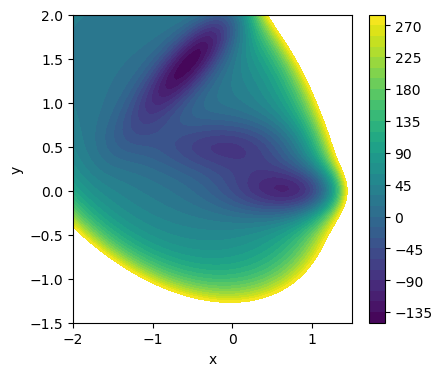

In [3]:
# this is a contour plot
fig = plt.figure(figsize=(4.5,4))

x = np.linspace(-2, 1.5, 100)
y = np.linspace(-1.5, 2, 100)
X, Y = np.meshgrid(x, y)
pes = muller_brown(X, Y)

plt.contourf(X, Y, pes, levels=np.arange(-150,300,15))
plt.colorbar()

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
from scipy.optimize import minimize

In [12]:
# starting point
x0, y0 = 0.6, 1.4
x0, y0 = -2, 1.5

# minimize (BFGS is the default method)
#def proxy(p):
#    return muller_brown(p[0],p[1])
#res = minimize(proxy, x0=(x0,y0))

res = minimize(lambda p: muller_brown(p[0],p[1]), x0=(x0,y0))
print(res)

# final point
xf, yf = res.x

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -146.69951720995348
        x: [-5.582e-01  1.442e+00]
      nit: 8
      jac: [ 1.907e-06  1.907e-06]
 hess_inv: [[ 1.351e-03  1.107e-03]
            [ 1.107e-03  1.355e-03]]
     nfev: 51
     njev: 17


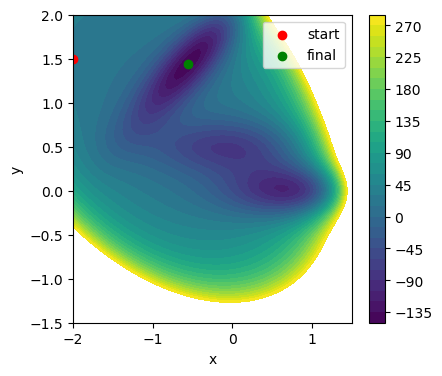

In [13]:
# plot them:
fig = plt.figure(figsize=(4.5,4))
plt.contourf(X, Y, pes, levels=np.arange(-150,300,15))
plt.colorbar()

plt.scatter(x0, y0, color='red', label='start')
plt.scatter(xf, yf, color='green', label='final')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Exercise: copy the cell above and modify it to ...
...run the minimization 100 times from a random starting point (use `random.uniform(min,max)`). Try differente methods: `BFGS`, `CG`, `Powell`, `Nelder-Mead`

In [17]:
import random
np.seterr(all='ignore')

method = 'Nelder-Mead'
method = 'CG'

# lists of starting points and final points
xs, ys = [], []
xf, yf = [], []
for i in range(100):
    x0 = random.uniform(-2, 2)
    y0 = random.uniform(-2, 2)
    xs.append(x0)
    ys.append(y0)
    res = minimize(lambda p: muller_brown(p[0],p[1]), x0=(x0,y0), method=method)
    if res.success:
        xf.append(res.x[0])
        yf.append(res.x[1])


In [18]:
# plot them
fig = plt.figure(figsize=(4.5,4))
plt.contourf(X, Y, pes, levels=np.arange(-150,300,15))
plt.colorbar()

plt.scatter(xs, ys, color='red', label='start')
plt.scatter(xf, yf, color='green', label='final')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=3)
plt.show()

### 2.2 Fitting
SciPy provides a powerful `scipy.optimize.curve_fit()` function which can use different algorithm to perform both constrained and unconstrained fitting.

Let's prepare some data points to be fitted. We generate them randomly.

In [19]:
np.random.seed(1234)

xdata = np.arange(0, 10)
ydata = 5*np.random.random(10) - 2

In [20]:
fig = plt.figure(figsize=(4,4))
plt.scatter(xdata, ydata)
plt.show()

In order to fit, we have to create a function taking `x` and all fitting parameters as arguments. Remember to use math functions from NumPy, not from `math`. We can also use an anonymous `lambda` function.

Let's fit and plot the result.

In [21]:
from scipy.optimize import curve_fit

In [22]:
def f(x, a, b, c):
    return a * np.exp(b*x) + c

popt, pcov = curve_fit(f, xdata, ydata)
print('optimized parameters (a,b,c):', popt)
print('sigma of opt. params (a,b,c):', np.sqrt(np.diag(pcov)))

optimized parameters (a,b,c): [0.07803689 0.38537478 0.23453491]
sigma of opt. params (a,b,c): [0.42422831 0.58764503 1.12349271]


In [23]:
fig = plt.figure(figsize=(4,4))
x = np.linspace(0, 10, 100)
plt.scatter(xdata, ydata, label='data')
plt.plot(x, f(x, *popt), label='fit')      # *popt "unpacks" the array into a, b, c
plt.legend()
plt.show()

Let's try other functions. In particular let's verify the urban legend that *"with three gaussians you can fit every data set"*.

In [24]:
def f(x, a, b, c, d):
    return a*np.cos(b*x) + c*x + d

popt, pcov = curve_fit(f, xdata, ydata)
print('optimized parameters:', popt)
print('sigma of opt. params:', np.sqrt(np.diag(pcov)))

optimized parameters: [-1.31596281  1.13970729  0.1270795   0.37455103]
sigma of opt. params: [0.41807721 0.05852366 0.10583196 0.54837391]


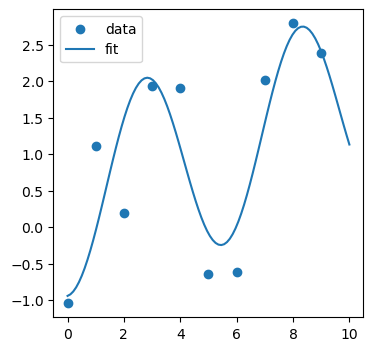

In [25]:
fig = plt.figure(figsize=(4,4))
x = np.linspace(0, 10, 100)
plt.scatter(xdata, ydata, label='data')
plt.plot(x, f(x, *popt), label='fit')
plt.legend()
plt.show()

In [26]:
def gauss(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/sigma)

def f(x, a1,b1,c1, a2,b2,c2, a3,b3,c3):
    return gauss(x,a1,b1,c1) + gauss(x,a2,b2,c3) + gauss(x,a3,b3,c3)

popt, pcov = curve_fit(f, xdata, ydata, p0=(1,2,0.5, -1,4,0.5, 1,8,0.5), method='trf')
print('optimized parameters:', popt)
print('sigma of opt. params:', np.sqrt(np.diag(pcov)))

optimized parameters: [-7.08903825  5.41012603  1.84855307  5.71176192  5.10013669 -7.18661686
  2.30109422  8.57635751  4.39221242]
sigma of opt. params: [6.72381724e+01 1.25381384e+00 9.59932880e+00 6.77696504e+01
 7.93400866e+00 4.08937419e-13 8.69061424e+00 1.00217125e+01
 1.03006692e+01]


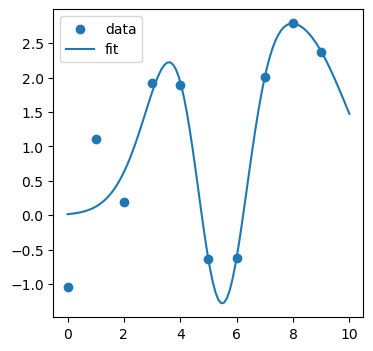

In [27]:
fig = plt.figure(figsize=(4,4))
x = np.linspace(0, 10, 100)
plt.scatter(xdata, ydata, label='data')
plt.plot(x, f(x, *popt), label='fit')
plt.legend()
plt.show()

This is not working well, but maybe, with four gaussians...

## 3. Interpolation
Interpolation is different from fitting. In fitting the curve minimizes the quadratic difference with the data points. In interpolation instaed, the curve passes exactly through the points.

Let's try to interpolate the same set of data using piece-wise polynomial functions. The `scipy.interpolate.interp1d(xdata,ydata,...)` **returns a function** that interpolated the data points.

`scipy.interpolate` can also interpolate the data using **cubic splines**, **B-splines**, and many other, also in multiple dimensions. In particular cubic splines are continous up to the second derivative.

In [28]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [29]:
fig = plt.figure()

x = np.linspace(0, 9, 100)
plt.scatter(xdata, ydata, label='data')

f = interp1d(xdata, ydata, kind='linear')
plt.plot(x, f(x), label='linear interp.')

f = interp1d(xdata, ydata, kind='quadratic')
plt.plot(x, f(x), label='quad. interp.')

f = CubicSpline(xdata, ydata)
plt.plot(x, f(x), label='cubic spline')

plt.legend()
plt.show()

## 4. Find peaks in data
The `scipy.signal` sub-package provides poweful functions for **signal processing**. In the section we will analyze Powder X-ray Diffraction Data (PXRD) of micro- and nano-structured CeO$_2$ kindly provided by Prof. M. Scavini.

The PXRD data has been recorded at the ESRF synchrotron with a wavelength of 0.3543800 Å. The `.xye` files contain three columns: $2\theta$, intensity, intensity uncertainty.


### 4.1 Load the data sets...
...and plot the diffractograms.

In [30]:
ceo2_micro = np.loadtxt('ch5157_CeO2_900C_090K_10mm_003.xye', usecols=(0,1))
ceo2_nano1 = np.loadtxt('ch5157_CeO2E_500C_090K_10mm_005.xye', usecols=(0,1))
ceo2_nano2 = np.loadtxt('ch5157_CeO2E_200C_090K_10mm_010.xye', usecols=(0,1))

fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(ceo2_micro[:,0], ceo2_micro[:,1], label='micro')
plt.xlabel("$2\\theta$ (°)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(ceo2_nano1[:,0], ceo2_nano1[:,1], label='nano1')
plt.plot(ceo2_nano2[:,0], ceo2_nano2[:,1], label='nano2')
plt.xlabel("$2\\theta$ (°)")
plt.legend()

plt.show()

Let's use `scipy.signal.find_peaks` on the microstructured ceria PXRD. `find_peaks` returns a list of array indexes corresponding to the peaks.

Let's plot them and let's tune the parameters of `find_peaks` to find only the relevant peaks.

In [31]:
from scipy.signal import find_peaks

In [64]:
twotheta = ceo2_nano2[:,0]
pxrd = ceo2_nano2[:,1]

#peaks, props = find_peaks(pxrd)
peaks, props = find_peaks(pxrd, height=1000, distance=20)
print('peaks indexes:', peaks)

# extract the 2*theta of the peaks
twotheta_peaks = twotheta[peaks]

peaks indexes: [ 549  605  625  646  963 1145 1526 1547 1568 1747]


In [65]:
fig = plt.figure(figsize=(8,4))
plt.plot(twotheta, pxrd, label='micro')
plt.scatter(twotheta_peaks, pxrd[peaks], marker='X', color='orange')
plt.xlabel("$2\\theta$ (°)")
plt.show()

The next step is to transform the data from $2\theta$ in $|Q|$ according to:

$|Q| = \frac{4\pi}{\lambda} sin\theta$

Write a function that takes a $2\theta$ *ndarray* and the wavelength and returns $|Q|$.

In [36]:
wavelength = 0.35438    # angstrom

def twotheta_to_q(twotheta, wave):
    theta = twotheta/2.0
    theta = theta*np.pi/180
    
    q = 4*np.pi / wave * np.sin(theta)
    return q


CeO$_2$ is cubic with space group Fm-3m. In the *fcc* crystal there are systematic extinctions. The allowed Miller indexes $(h,k,l)$ are either all even or all odd.
Let's index the peaks:

1. create a list of (h,k,l) tuples, with h >= k >= l, all even or all odd values up to h,k,l <= 5, h=k=l=0 excluded
2. sort the list in order of increasing modulus $h^2+k^2+l^2$ using the `key` option of the `sort` method
3. calculate the lattice parameter from the first 10 peaks according to the formula:

$a_i = \frac{2\pi}{Q_i} \sqrt{h^2+k^2+l^2}$.

In [42]:
hkl = []

for h in range(6):
    for k in range(6):
        for l in range(6):
            # if h == k == l == 0:
            if h==0 and k==0 and l==0:
                continue
            
            if h >= k >= l:
                if (h%2 == k%2 == l%2 == 0) or (h%2 == k%2 == l%2 == 1): 
                    hkl.append( (h,k,l) )

print("before sorting:")
print(hkl)

before sorting:
[(1, 1, 1), (2, 0, 0), (2, 2, 0), (2, 2, 2), (3, 1, 1), (3, 3, 1), (3, 3, 3), (4, 0, 0), (4, 2, 0), (4, 2, 2), (4, 4, 0), (4, 4, 2), (4, 4, 4), (5, 1, 1), (5, 3, 1), (5, 3, 3), (5, 5, 1), (5, 5, 3), (5, 5, 5)]


In [43]:
#def f(t):
#    return t[0]**2 + t[1]**2 + t[2]**2

#f = lambda t: t[0]**2 + t[1]**2 + t[2]**2
#hkl.sort(key=f)

hkl.sort(key=lambda t: t[0]**2 + t[1]**2 + t[2]**2)
print("after sorting:")
print(hkl)

after sorting:
[(1, 1, 1), (2, 0, 0), (2, 2, 0), (3, 1, 1), (2, 2, 2), (4, 0, 0), (3, 3, 1), (4, 2, 0), (4, 2, 2), (3, 3, 3), (5, 1, 1), (4, 4, 0), (5, 3, 1), (4, 4, 2), (5, 3, 3), (4, 4, 4), (5, 5, 1), (5, 5, 3), (5, 5, 5)]


In [66]:
# transform from 2*theta to q
q = twotheta_to_q(twotheta_peaks, wavelength)

hkl = np.array(hkl)
print(hkl.shape)

(19, 3)


In [49]:
print(hkl)
print(hkl[3,:], np.linalg.norm(hkl[3,:]))

[[1 1 1]
 [2 0 0]
 [2 2 0]
 [3 1 1]
 [2 2 2]
 [4 0 0]
 [3 3 1]
 [4 2 0]
 [4 2 2]
 [3 3 3]
 [5 1 1]
 [4 4 0]
 [5 3 1]
 [4 4 2]
 [5 3 3]
 [4 4 4]
 [5 5 1]
 [5 5 3]
 [5 5 5]]
[3 1 1] 3.3166247903554


In [53]:
print(hkl.shape)
print(np.linalg.norm(hkl, axis=1).shape)


(19, 3)
(19,)


In [67]:
reflections = 10
a = 2*np.pi / q[0:reflections] * np.linalg.norm(hkl[0:reflections,:],axis=1)

for i in range(reflections):
    print(f'peak #{i:2}  q={q[i]:10.4f}  a={a[i]:10.6f}')

print()
print(f'average lattice parameter: {np.mean(a):.4f} ± {np.std(a):.4f}')

peak # 0  q=    2.0072  a=  5.421756
peak # 1  q=    2.1802  a=  5.763771
peak # 2  q=    2.2420  a=  7.926630
peak # 3  q=    2.3069  a=  9.033502
peak # 4  q=    3.2847  a=  6.626317
peak # 5  q=    3.8451  a=  6.536379
peak # 6  q=    5.0148  a=  5.461431
peak # 7  q=    5.0791  a=  5.532348
peak # 8  q=    5.1434  a=  5.984614
peak # 9  q=    5.6908  a=  5.737054

average lattice parameter: 6.4024 ± 1.1377
